## Black Border Detection and Cropping

This Jupyter notebook demonstrates the steps to detect black borders in an image and crop the contents within those borders. The process includes converting the image to grayscale, detecting edges, applying Hough transform to find lines, and identifying the rectangular contours which likely represent the borders.

### Step 1: Convert to Grayscale

The first step is to convert the image to grayscale to simplify the edge detection process.

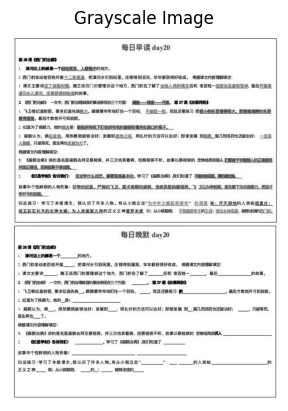

In [163]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image in grayscale
input_path = 'input'
image_name = 'D20.jpg'
image = cv2.imread(f'{input_path}/{image_name}')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
plt.title('Grayscale Image')
plt.axis('off')
plt.show()
    

### Step 2: Canny Edge Detection

Canny edge detection is used to identify the edges in the image. This will help in finding the straight lines that make up the borders.

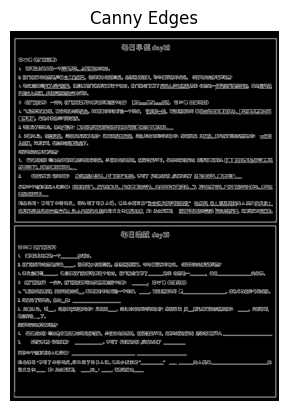

In [164]:

# Use Canny edge detection
edges = cv2.Canny(gray, threshold1=50, threshold2=150)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB))
plt.title('Canny Edges')
plt.axis('off')
plt.show()
    

### Step 3: Hough Line Transform

The Hough Line Transform is a feature extraction technique used in image analysis to detect straight lines.

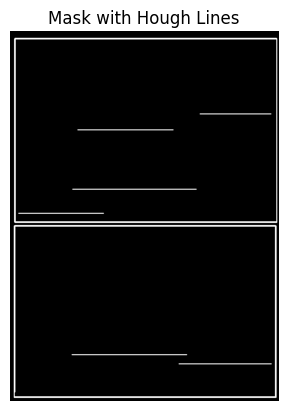

In [165]:

# Adjust Hough transform parameters
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=200, maxLineGap=5)

# Create a mask image of the same size as original, filled with zeros (black)
mask = np.zeros_like(gray)

# Draw the lines on the mask if any lines are found
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)

plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))
plt.title('Mask with Hough Lines')
plt.axis('off')
plt.show()
    

### Step 4: Find Contours

Contours are detected in the mask created from the Hough Line Transform. We are specifically interested in rectangular contours that could represent the borders.

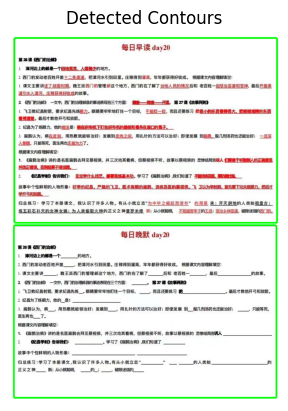

In [166]:

# Find contours on the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on the assumption that a border will form a rectangle
rectangular_contours = [cnt for cnt in contours if len(cv2.approxPolyDP(cnt, 0.05 * cv2.arcLength(cnt, True), True)) == 4]

# Draw all contours found on a copy of the original image for visualization
contour_image = image.copy()
cv2.drawContours(contour_image, rectangular_contours, -1, (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Contours')
plt.axis('off')
plt.show()
    

### Step 5: Crop Images Inside Borders

The images inside the largest rectangular contours are cropped and saved. These should correspond to the areas inside the black borders of the original image.

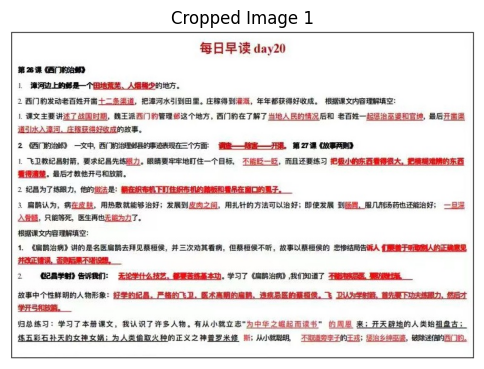

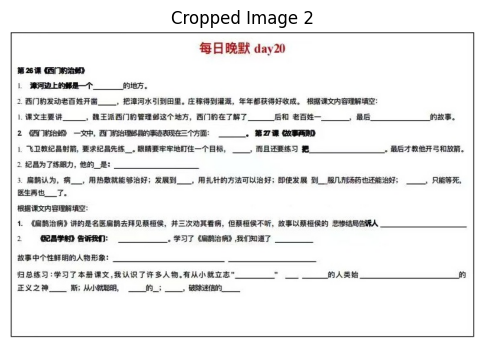

Cropped images saved at:
output/D20.jpg_c1.jpg
output/D20.jpg_c2.jpg


In [167]:

# Assuming the largest rectangular contour is the border, we'll sort them by size
rectangular_contours = sorted(rectangular_contours, key=cv2.contourArea, reverse=True)[:2]

# Crop the images inside the borders
output_base_path = f'output/{image_name}' # Update the base path for your environment
cropped_images = []
for i, cnt in enumerate(rectangular_contours):
    x, y, w, h = cv2.boundingRect(cnt)
    cropped_image = image[y:y+h, x:x+w]
    output_path = f"{output_base_path}_c{i+1}.jpg"
    cv2.imwrite(output_path, cropped_image)
    cropped_images.append(output_path)

# Display cropped images
for i, img_path in enumerate(cropped_images):
    img = cv2.imread(img_path)
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Cropped Image {i+1}')
    plt.axis('off')
    plt.show()
    
print("Cropped images saved at:")
for img_path in cropped_images:
    print(img_path)
